In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

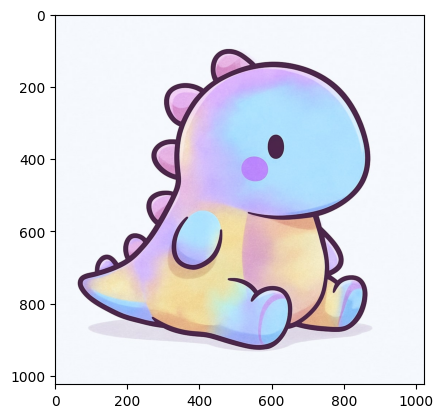

In [3]:
img = cv2.imread('image.jpg')
plt.imshow(img)

In [4]:
cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()

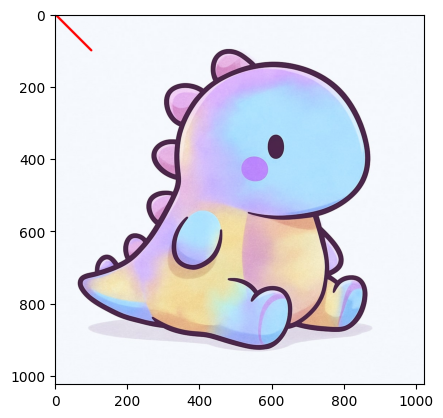

In [ ]:
cv2.line(img, (0, 0), (200, 100), (255, 0, 0), 5)
# cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
# cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
# pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
# pts = pts.reshape((-1, 1, 2))
# cv2.polylines(img, [pts], True, (0, 255, 255), 5)
# cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

plt.imshow(img)


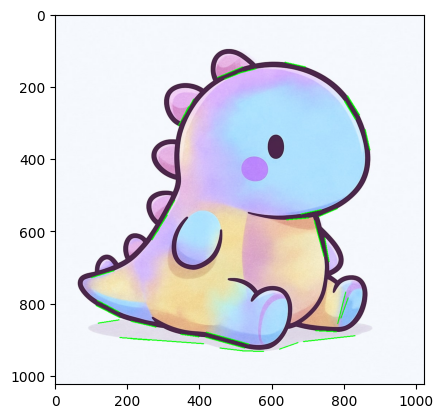

In [6]:
img = cv2.imread('image.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                30,
                minLineLength=50,
                maxLineGap=10,
        ) # detect lines

"""
From opencv website:

dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
lines: A vector that will store the parameters (xstart,ystart,xend,yend) of the detected lines. Returned by HoughLinesP
rho : The resolution of the parameter r in pixels. We use 1 pixel.
theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
threshold: The minimum number of intersections to "*detect*" a line
minLineLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
maxLineGap: The maximum gap between two points to be considered in the same line.
"""

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)